# Name :  **Parth Vohra**
## Roll No. : 102016044
### Batch : 3CS10






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Question 1

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris_df.loc[(iris_df["target"])>0] = 1

In [4]:
iris_df["target"].unique()

array([0., 1.])

In [5]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

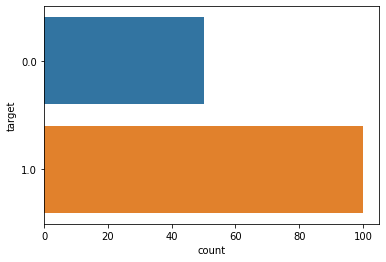

In [6]:
sns.countplot(y=iris_df.iloc[:,4], data=iris_df)

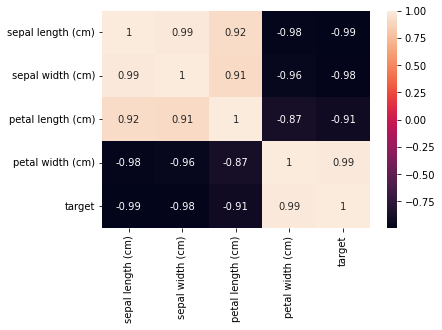

In [7]:
sns.heatmap(iris_df.corr(), annot=True)

In [8]:
X = iris_df.drop("target", axis=1)
Y = iris_df.iloc[:,4]

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (105, 5)
x_test.shape =  (45, 5)
y_train.shape =  (105,)
y_test.shape =  (45,)


In [11]:
n = 1000
alpha = 0.01
m,k = x_train.shape
beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

[ 0.64222568 -0.92443656 -0.89968101 -0.8190506   0.93144237]


In [12]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [13]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)


True Positive =  26
True Negative =  19
False Positive =  0
False Negative =  0


In [14]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

Accuracy =  1.0
Precision Positive =  1.0
Recall Positive =  1.0
F1_Score Positive =  1.0
Precision Negative =  1.0
Recall Negative =  1.0
F1_Score Negative =  1.0


In [15]:


macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)

Macro Precision =  1.0
Macro Recall =  1.0
Macro F1_Score =  1.0


In [16]:
l1 = len(y_test[y_test==0])
l2 = len(y_test[y_test==1])
weighted_precision = (l1*precision_neg + l2*precision_pos)/(l1+l2)
weighted_recall = (l1*recall_neg + l2*recall_pos)/(l1+l2)
weighted_f1_score = (l1*f1_score_neg + l2*f1_score_pos)/(l1+l2)
print("Weighted Precision = ", weighted_precision)
print("Weighted Recall = ", weighted_recall)
print("Weighted F1_Score = ", weighted_f1_score)

Weighted Precision =  1.0
Weighted Recall =  1.0
Weighted F1_Score =  1.0


## Question 2

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
headers = ["col1", "col2", "target"]

In [20]:
exam_df = pd.read_table("/content/drive/MyDrive/ML Lab/Lab_05/exam6.txt", sep=",", names=headers)
exam_df.head()

,col1,col2,target
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
exam_df.isna().sum()

In [ ]:
exam_df.describe()

In [ ]:
sns.scatterplot(data=exam_df, x="col1", y="col2", hue="target")

In [ ]:
X = exam_df.drop("target", axis=1)
Y = exam_df.iloc[:,-1]

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6, interaction_only=False, include_bias=False)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [ ]:
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

### Question 2 Part 1

In [ ]:
n = 1000
alpha = 10
m,k = x_train.shape
beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

In [ ]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

In [ ]:
precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

In [ ]:
macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)

### Question 2 Part 2


In [ ]:
lambda_val = 0.2
A = x_train.T.dot(x_train)
I = np.identity(A.shape[0])
B = A + lambda_val * I
C = np.linalg.inv(B)
D = C.dot(x_train.T)
beta = D.dot(y_train)

In [ ]:
n = 1000
alpha = 10
m,k = x_train.shape
# beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

In [ ]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

In [ ]:
precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

In [ ]:
macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)